Confg. Spacy

In [1]:
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [64]:
import spacy

In [2]:
import pandas as pd
import os
import glob
from utils import *


Configuración para poder observar todo el comentario en el dataframe



In [3]:
pd.set_option('max_colwidth', None)

#**Recopilación de datos**

##**Fuente #1 Reddit**

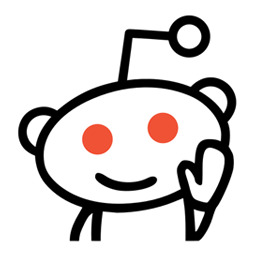

Obtención del dataset se describe en el notebook **Recopilación de data - Reddit**

###Creación de dataframe

Recopilación de archivos csv

In [4]:

extension = 'csv'
csv_reddit_files = glob.glob('*_result.{}'.format(extension))

Concatenación de Dataframes

In [5]:
df_rd = pd.concat((pd.read_csv(f) for f in csv_reddit_files)).reset_index(drop=True)

In [6]:
df_rd.shape

(203038, 6)

###Delimitación de dataset

####Retirar comentarios con menos de 4 palabras. A modo de mejorar el contenido del dataset

In [7]:
df_rd = df_rd[df_rd['comment'].str.split().str.len() > 3]

**Rangos de fases**

In [8]:
PHASES = [(12,14), (14,18),(18,21)]


####Funciones de ayuda para poder delimitar dataset

In [9]:
def get_number_comments_per_score_and_hour(score, hour):
  hour = 12
  date ="2021-01-06 " + str(hour)
  return df_rd[(df_rd.score > score) & (df_rd.created_hour== date)].shape[0]

In [10]:
def get_avg_score_for_phase():
   for phase in PHASES:
      phaseBegin ="2021-01-06 " + str(phase[0])
      phaseEnd ="2021-01-06 " + str(phase[1])
      filtered_df_rd_1 =  df_rd[(df_rd.created_hour >= phaseBegin) & 
                           (df_rd.created_hour < phaseEnd) ]
      print(f"Score promedio para  fase {phase} : {filtered_df_rd_1.score.mean()}")


In [11]:
def get_number_comments_per_score(score):
  phasesDict = {}
  for phase in PHASES:
      phaseBegin ="2021-01-06 " + str(phase[0])
      phaseEnd ="2021-01-06 " + str(phase[1])
      filtered_df_rd_1 =  df_rd[(df_rd.created_hour >= phaseBegin) & 
                           (df_rd.created_hour < phaseEnd) ]
      filtered_df_rd_2 = filtered_df_rd_1[(filtered_df_rd_1.score >= score)]
      phasesDict[phase] = filtered_df_rd_2.shape[0]
      
  return phasesDict

In [12]:
def get_comments_per_score_and_phase(score,phase):
  phaseBegin ="2021-01-06 " + str(phase[0])
  phaseEnd ="2021-01-06 " + str(phase[1])
  filtered_df_rd_1 =  df_rd[(df_rd.created_hour >= phaseBegin) & 
                        (df_rd.created_hour < phaseEnd) &
                        (df_rd.score >= score)]
  return filtered_df_rd_1

In [13]:
def get_comments_per_score(score,phase):
  phaseBegin ="2021-01-06 " + str(phase[0])
  phaseEnd ="2021-01-06 " + str(phase[1])
  phasesDict[phase] = df_rd[(df_rd.score >= score) & (df_rd.created_hour >= phaseBegin) & 
                           (df_rd.created_hour < phaseEnd) ]
  return phasesDict

####**Análisis por fase**

Se manejarán 3 fases para clasificar los comentarios:

**Fase 1 Congregación de seguidores de Trump hacía el capitolio. Congreso sesionado sobre aceptación de resultados electorales(12 - 2 pm)**: 
   
Inicio - Conferencia de Trump arengando a sus seguidores a marchar contra el capitolio

Fin - Momentos previos a la irrupción del Capitolio por seguidores de Trump

**Fase 2 Invasión del Capitolio (2 - 6 pm)**: 
   
Inicio - Primer reporte de protestantes queriendo ingresar al Capitolio rompiendo las ventanas.

Fin - Inicio de toque de queda en Washington D.C. 
      Capitolio despejado de protestantes

**Fase 3 Consecuencias del asalto al Capitolio  (6 - 9 pm)**: 
   
Inicio - Capitolio despejado de sus invasores

Fin - Se reabre la sesión del Congreso

**Puntaje promedio por cada fase**

In [14]:
get_avg_score_for_phase()

Score promedio para  fase (12, 14) : 3.86519300560871
Score promedio para  fase (14, 18) : 12.610649140438097
Score promedio para  fase (18, 21) : 6.557285447130658


Si limitamos el mínimo de score a 3 para reducir el dataset , cuantos comentarios por fase se tendría?

In [15]:
get_number_comments_per_score(3)

{(12, 14): 7247, (14, 18): 49698, (18, 21): 19519}

Si limitamos el mínimo de score a 10 para reducir el dataset , cuantos comentarios por fase se tendría?

In [16]:
get_number_comments_per_score(10)

{(12, 14): 1260, (14, 18): 28082, (18, 21): 8596}

Si limitamos el mínimo de score a 20 para reducir el dataset , cuantos comentarios por fase se tendría?

In [17]:
get_number_comments_per_score(20)

{(12, 14): 119, (14, 18): 13952, (18, 21): 4245}

***

####**Elección de tamaño de dataset por fase**

**Fase 12 - 14 pm**
 Cant. 7659  - Comentarios mayores o iguales a  3 pts

**Fase 14 - 18 pm**  
 Cant. 14212 - Comentarios mayores o iguales a  20 pts

**Fase 18 - 21 pm**
 Cant. 8893  - Comentarios mayores o iguales a  10 pts

In [18]:
df_rd_first_phase = get_comments_per_score_and_phase(3,PHASES[0])
df_rd_second_phase = get_comments_per_score_and_phase(20,PHASES[1])
df_rd_third_phase = get_comments_per_score_and_phase(10,PHASES[2])


In [19]:
df_rd_first_phase.head()

,created,created_hour,comment,post,score,id
37648,2021-01-06 12:00:06,2021-01-06 12,OMG he needs the whole fucking song to preen???,krplc2,5,gibj59w
37650,2021-01-06 12:00:07,2021-01-06 12,There's the patented jerk off the air move.,krplc2,4,gibj5bx
37652,2021-01-06 12:00:09,2021-01-06 12,WTF is these awkward pointing shit. lol. This guy is a joke.,krplc2,3,gibj5h1
37685,2021-01-06 12:00:36,2021-01-06 12,Oops. Who unplugged the mic?,krplc2,5,gibj7o8
37697,2021-01-06 12:00:49,2021-01-06 12,lol his audio is off,krplc2,5,gibj8nz


####**EXTRA: Samples (filtro de dataset)**


In [20]:
df_rd.query('score < -150').sample()

,created,created_hour,comment,post,score,id
12855,2021-01-06 17:12:19,2021-01-06 17,"Trump supporters walk in to the capital building and wave American flags for 1 day = end of the world BLM & Antifa supporters burn city's, businesses, and beat people who try to defend their belonging to the ground for months = summer of love What am I missing? This is a genuine question. I will admit, I'm a bit silly sometimes in how I think.",krvwkf,-168,gicq92o


In [21]:
df_rd.query('score < -10 & created_hour=="2021-01-06 12"').sample()

,created,created_hour,comment,post,score,id
38760,2021-01-06 12:15:27,2021-01-06 12,I agree with Trump. The media in the US is neither free or fair. I have been switching through American news channels all day. Every fucking one of them is news hosts spouting their opinion. Disgusting.,krplc2,-14,gibl7cq


TOP 5 comentarios con mayor puntaje

In [22]:
df_rd.sort_values(by=['score'], ascending=False).head(5)

,created,created_hour,comment,post,score,id
117554,2021-01-06 14:42:31,2021-01-06 14,"This is terrorism. It's crazy that terrorists, so long as they're white, are allowed to infiltrate the capitol and pose for photos. But this is terrorism. And the president created it. It can't wait until Jan 20 at noon, he needs to be impeached again and removed tonight or tomorrow.",krvh1f,16260,gic56xb
117646,2021-01-06 14:43:22,2021-01-06 14,You did this Trump. You told them to go to the Capital. You told them this election was a farce and told them to rise up. You're the terrorist. Fuck you and fuck your supporters.,krvh1f,14477,gic5b2y
884,2021-01-06 15:19:30,2021-01-06 15,"What strikes me, is once they have forced their way in, they have no plan, are completely clueless. It is a wonderful metaphor for Trump.",krvwkf,12814,gica6e8
120293,2021-01-06 14:56:38,2021-01-06 14,"Remember kids, kneeling during the national anthem is anti-American, but actively preventing democracy in action by violently storming the capitol is true patriotism.",krvh1f,12376,gic739f
117514,2021-01-06 14:42:06,2021-01-06 14,"Rioters are storming the capitol building. Where is the national guard? Edit: An hour later, I'm calling them domestic terrorists.",krvh1f,10531,gic54vk


##**Fuente #2 patriots.win**

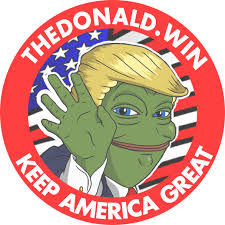

Obtención del dataset se describe en el notebook **Recopilación de data - patriots.win**

###**Creación de dataframe**

In [23]:
df_dt = pd.read_csv('thedonald comments.csv')

In [24]:
df_dt.shape

(4765, 3)

TOP 5 comentarios con mayor puntaje

In [25]:
df_dt.sort_values(by=['score'], ascending=False).head(5)

,comment,post_id,score
4153,The United States doesn't exist anymore.,11RhOzrpb9,1669
668,"sorry but we will be treated unfairly in EVERY way, SHAPE, and FORM... Edit: that doesn’t mean we cuck out. We fucking hold the line until the 20th. We fight until the fucking end.",11RhOrv3Yf,1139
1299,You mean some pedes were still hanging around on Reddit? What the hell is wrong with them,11RhOuBIlc,821
4154,This is the correct answer,11RhOzrpb9,743
4155,What Twitter did is literally a threat to national security. What if China sent a fucking nuke our way rn and he couldn't tell us? Edit: This site gives me much needed hope and sanity. I love you guys,11RhOzrpb9,570


###**Delimitación de dataframe**

####Retirar comentarios con menos de 4 palabras. A modo de mejorar el contenido del dataset

In [26]:
df_dt = df_dt[df_dt['comment'].str.split().str.len() > 3]

####Delimitar por score

Score promedio

In [27]:
df_dt.score.mean()

16.414539160536563

Total de comentarios con 3 a más puntaje

In [28]:
df_dt.query('score >= 3').shape

(3146, 3)

A manera de mejorar el contenido del dataset, se escojerá que como mínimo cada comentario tenga 3 pts

In [29]:
df_dt = df_dt.query('score >= 3')

#**Preprocesamiento de texto**

Instalación de libreria **contractions** . Ejemplo de uso: He's  =>  He is 

In [30]:
!pip install contractions


Imports + Descarga de recursos NTLK

In [31]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import contractions 

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

####**Función para limpieza de dataset**

In [33]:
stopwords = stopwords.words('english')
stopwords.extend(['u', 'us'])
lm = WordNetLemmatizer()
tknzr = TweetTokenizer()
def text_prep(text:str):
    tokens = []
    text = re.sub('https\S+', '', text)
    text = re.sub('www\S+', '', text)
    for w in tknzr.tokenize(text):
        w = w.lower()        
        if ((re.search('[a-zA-Z]', w)) and (w not in stopwords)): tokens.append(lm.lemmatize(w))
    return ' '.join(tokens)

###**Fuente #1 Reddit**

####**Adición de nuevas columnas**

In [34]:

df_rd_first_phase['comment_contraction'] = df_rd_first_phase.comment.apply(lambda x: contractions.fix(x))
df_rd_first_phase['comment_prep'] = df_rd_first_phase.comment_contraction.apply(text_prep)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:

df_rd_second_phase['comment_contraction'] = df_rd_second_phase.comment.apply(lambda x: contractions.fix(x))
df_rd_second_phase['comment_prep'] = df_rd_second_phase.comment_contraction.apply(text_prep)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
df_rd_third_phase['comment_contraction'] = df_rd_third_phase.comment.apply(lambda x: contractions.fix(x))
df_rd_third_phase['comment_prep'] = df_rd_third_phase.comment_contraction.apply(text_prep)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


####**Análisis de frecuencia de palabras por fase**

#####**Primera fase**

######**Frecuencia**

In [37]:
freq_first_phase =  FreqDist(tknzr.tokenize(
    ' '.join(df_rd_first_phase.comment_prep)
  ))


FreqDist(tknzr.tokenize(' '.join(df_rd_first_phase.comment_prep)))
most_common_first_phase = freq_first_phase.most_common(50)

In [38]:
freq_first_phase.N(), len(freq_first_phase.items())

(60911, 7672)

In [39]:
wordcloud = WordCloud(background_color='white',
                      max_font_size = 70,
                      collocations=False).generate(' '.join(df_rd_first_phase.comment_prep)
    .replace('trump', '')
    .replace('people', '')
    .replace('capitol', ''))

######**Wordcloud**

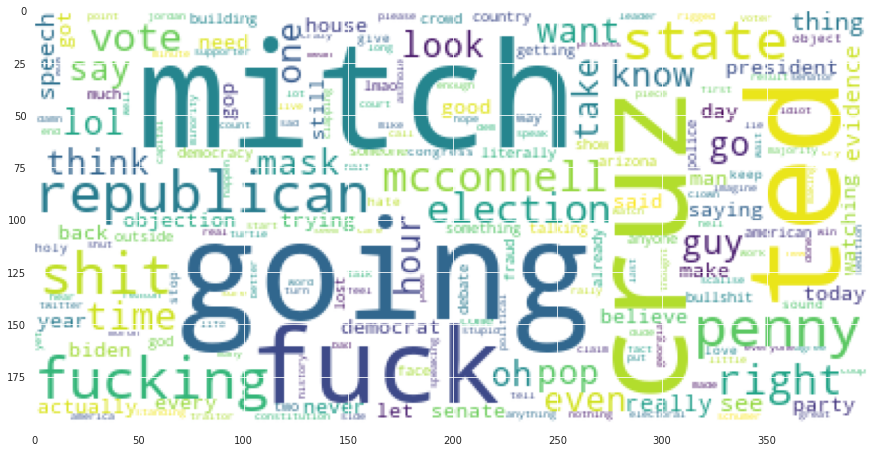

In [40]:

plt.figure(figsize=[15,8])
plt.imshow(wordcloud)

Buscando comentarios sobre Ted Cruz

In [41]:
df_rd_first_phase[df_rd_first_phase['comment'].str.contains("Ted")].sort_values(by=['score'], ascending=False).head(5)

,created,created_hour,comment,post,score,id,comment_contraction,comment_prep
51891,2021-01-06 13:47:43,2021-01-06 13,"In times like these, it's worth to remember the wise words of the British poet Sir John of Oliver: >I do not like that man Ted Cruz > >I do not like his far-right views > >I do not like his stupid chin > >I do not like his smarmy grin > >I do not like him with a beard > >I do not like him freshly sheared > >I do not like Ted Cruz at all > >That man Ted Cruz can suck my balls",krplc2,50,gibxsiv,"In times like these, it is worth to remember the wise words of the British poet Sir John of Oliver: >I do not like that man Ted Cruz > >I do not like his far-right views > >I do not like his stupid chin > >I do not like his smarmy grin > >I do not like him with a beard > >I do not like him freshly sheared > >I do not like Ted Cruz at all > >That man Ted Cruz can suck my balls",time like worth remember wise word british poet sir john oliver like man ted cruz like far-right view like stupid chin like smarmy grin like beard like freshly sheared like ted cruz man ted cruz suck ball
45767,2021-01-06 13:20:52,2021-01-06 13,"Hey Ted Cruz, Keep your fucking nose out of my state. Sincerely, An Arizonan that hates you.",krplc2,48,gibu4zl,"Hey Ted Cruz, Keep your fucking nose out of my state. Sincerely, An Arizonan that hates you.",hey ted cruz keep fucking nose state sincerely arizonan hate
53932,2021-01-06 13:55:58,2021-01-06 13,List of Traitors to their oath to uphold the Constitution of the United States: * Ted Cruz (R-Texas) * Steve Scalise (R-Louisiana) * Jim Jordan (R-Ohio) * Andy Biggs (R-Arizona) * Kevin McCarthy (R-California) * Paul Gosar (R-Arizona) * Lauren Boebert (R-Colorado),krplc2,42,gibyxxd,List of Traitors to their oath to uphold the Constitution of the United States: * Ted Cruz (R-Texas) * Steve Scalise (R-Louisiana) * Jim Jordan (R-Ohio) * Andy Biggs (R-Arizona) * Kevin McCarthy (R-California) * Paul Gosar (R-Arizona) * Lauren Boebert (R-Colorado),list traitor oath uphold constitution united state ted cruz r-texas steve scalise r-louisiana jim jordan r-ohio andy biggs r-arizona kevin mccarthy r-california paul gosar r-arizona lauren boebert r-colorado
45333,2021-01-06 13:18:38,2021-01-06 13,Ted Cruz is a piece of shit. Smug fucking bastard. And every one that applauded in the senate should take a good long hard look at themselves. They won't. But they should,krplc2,32,gibtu2r,Ted Cruz is a piece of shit. Smug fucking bastard. And every one that applauded in the senate should take a good long hard look at themselves. They will not. But they should,ted cruz piece shit smug fucking bastard every one applauded senate take good long hard look
44113,2021-01-06 13:14:49,2021-01-06 13,Ted Cruz standing smugly as he receives a standing ovation from some fringe nut jobs like a conquering hero rather than a guy who is cynically playing for those idiot red hatters' votes.,krplc2,31,gibtb33,Ted Cruz standing smugly as he receives a standing ovation from some fringe nut jobs like a conquering hero rather than a guy who is cynically playing for those idiot red hatters' votes.,ted cruz standing smugly receives standing ovation fringe nut job like conquering hero rather guy cynically playing idiot red hatter vote


Buscando comentarios sobre Mitch McConnell

In [42]:
df_rd_first_phase[df_rd_first_phase['comment'].str.contains("Mitch")].sort_values(by=['score'], ascending=False).head(10)

,created,created_hour,comment,post,score,id,comment_contraction,comment_prep
51775,2021-01-06 13:47:09,2021-01-06 13,"https://twitter.com/Phil_Lewis_/status/1346889314001629185?s=20 Mitch McConnell, just now: ""The voters, the courts, the states have all spoken. They've all spoken. If we overrule them, it would damage our republic forever. Where was this rhetoric in the past year or so? If Dolt 45 is still objecting, and has crowds of Qultists supporting him now... It's because reality was not defended these past few years.",krplc2,64,gibxpoo,"https://twitter.com/Phil_Lewis_/status/1346889314001629185?s=20 Mitch McConnell, just now: ""The voters, the courts, the states have all spoken. they have all spoken. If we overrule them, it would damage our republic forever. Where was this rhetoric in the past year or so? If Dolt 45 is still objecting, and has crowds of Qultists supporting him now... it is because reality was not defended these past few years.",mitch mcconnell voter court state spoken spoken overrule would damage republic forever rhetoric past year dolt still objecting crowd qultists supporting reality defended past year
50693,2021-01-06 13:41:16,2021-01-06 13,"Mitch is saying that republicans can't ""act like democrats"" and doing this will end the electoral college and republicans can't win without the electoral college. He's not saying anything good or commendable. Just because a republican doesn't do a coup doesn't mean he's a good person. Mitch likes to steal power behind the scenes, not out in the open.[ Same with everyone who praised Raffenspurger in GA.](https://www.motherjones.com/politics/2021/01/brad-raffensperger-defended-the-election-but-not-the-right-to-vote-in-future-ones/) Praise Stacey Abrams for the work she has done in Georgia, which is what has allowed us to fend off a coup. Praise all the people who voted for democrats because they know it's life or death of democracy. Don't praise republicans who just prefer to steal power quietly and over time rather than loudly all at once.",krplc2,63,gibwx3c,"Mitch is saying that republicans can not ""act like democrats"" and doing this will end the electoral college and republicans can not win without the electoral college. he is not saying anything good or commendable. Just because a republican does not do a coup does not mean he is a good person. Mitch likes to steal power behind the scenes, not out in the open.[ Same with everyone who praised Raffenspurger in GA.](https://www.motherjones.com/politics/2021/01/brad-raffensperger-defended-the-election-but-not-the-right-to-vote-in-future-ones/) Praise Stacey Abrams for the work she has done in Georgia, which is what has allowed us to fend off a coup. Praise all the people who voted for democrats because they know it is life or death of democracy. do not praise republicans who just prefer to steal power quietly and over time rather than loudly all at once.",mitch saying republican act like democrat end electoral college republican win without electoral college saying anything good commendable republican coup mean good person mitch like steal power behind scene open everyone praised raffenspurger ga praise stacey abrams work done georgia allowed fend coup praise people voted democrat know life death democracy praise republican prefer steal power quietly time rather loudly
49700,2021-01-06 13:37:28,2021-01-06 13,Mitch McConnell is now banned from /r/conservative,krplc2,30,gibwegi,Mitch McConnell is now banned from /r/conservative,mitch mcconnell banned r conservative
50632,2021-01-06 13:41:01,2021-01-06 13,I hate the guy but I would encourage y'all to watch Mitch McConnell's speech. That was fucking cash.,krplc2,27,gibwvwh,I hate the guy but I would encourage you all to watch Mitch McConnell's speech. That was fucking cash.,hate guy would encourage watch mitch mcconnell's speech fucking cash
51678,2021-01-06 13:46:40,2021-01-06 13,That was the first time I listened to Mitch McConnell and didn't think he was a compl

#####**Segunda fase**

######**Frecuencia**

In [43]:
freq_second_phase = FreqDist(tknzr.tokenize(
    ' '.join(df_rd_second_phase.comment_prep)
    ))

most_common_second_phase = freq_second_phase.most_common(50)

In [44]:
most_common_second_phase

[('trump', 3211),
 ('people', 2196),
 ('capitol', 1899),
 ('terrorist', 1493),
 ('police', 1393),
 ('would', 1316),
 ('fucking', 1303),
 ('like', 1270),
 ('fuck', 1078),
 ('need', 1036),
 ('get', 1034),
 ('building', 1008),
 ('right', 963),
 ('one', 856),
 ('going', 836),
 ('republican', 803),
 ('blm', 794),
 ('country', 780),
 ('protest', 744),
 ('go', 739),
 ('national', 737),
 ('president', 732),
 ('election', 677),
 ('guard', 677),
 ('coup', 656),
 ('protestors', 633),
 ('shit', 628),
 ('time', 598),
 ('state', 583),
 ('year', 579),
 ('supporter', 566),
 ('even', 562),
 ('know', 559),
 ('conservative', 555),
 ('law', 555),
 ('white', 550),
 ('today', 523),
 ('let', 508),
 ('shot', 502),
 ('biden', 502),
 ('think', 496),
 ('america', 495),
 ('capital', 491),
 ('protester', 491),
 ('see', 488),
 ('want', 473),
 ('say', 455),
 ('office', 448),
 ('every', 445),
 ('guy', 445)]

In [45]:
freq_second_phase.N(), len(freq_second_phase.items())

(186382, 12780)

In [46]:
wordcloud_2 = WordCloud(background_color='white',
                      max_font_size = 70,
                      collocations=False).generate(' '.join(df_rd_second_phase.comment_prep)
.replace('trump', '')
    .replace('people', '')
    .replace('capitol', ''))

######**Wordcloud**

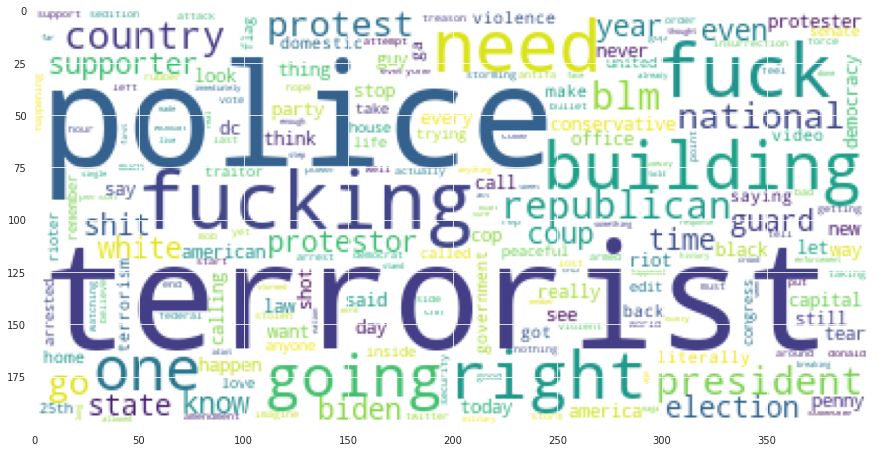

In [47]:

plt.figure(figsize=[15,8])
plt.imshow(wordcloud_2)

#####**Tercera fase**

######**Frecuencia**

In [48]:
freq_third_phase = FreqDist(tknzr.tokenize(
    ' '.join(df_rd_third_phase.comment_prep)
   ))
most_common_third_phase = freq_third_phase.most_common(50)

In [49]:
most_common_third_phase

[('trump', 1997),
 ('people', 1012),
 ('capitol', 805),
 ('like', 761),
 ('would', 669),
 ('twitter', 633),
 ('president', 597),
 ('terrorist', 596),
 ('one', 592),
 ('get', 563),
 ('penny', 540),
 ('fucking', 536),
 ('police', 532),
 ('going', 530),
 ('today', 530),
 ('right', 477),
 ('republican', 446),
 ('25th', 443),
 ('need', 438),
 ('fuck', 429),
 ('tweet', 424),
 ('election', 397),
 ('time', 397),
 ('building', 389),
 ('think', 385),
 ('shit', 380),
 ('day', 361),
 ('go', 358),
 ('year', 334),
 ('know', 333),
 ('thing', 333),
 ('shot', 325),
 ('still', 324),
 ('supporter', 321),
 ("trump's", 320),
 ('even', 310),
 ('say', 303),
 ('country', 292),
 ('white', 288),
 ('let', 285),
 ('curfew', 278),
 ('could', 278),
 ('see', 273),
 ('protest', 269),
 ('state', 265),
 ('got', 260),
 ('senate', 247),
 ('congress', 246),
 ('account', 246),
 ('blm', 243)]

In [50]:
wordcloud_3 = WordCloud(background_color='white',
                      max_font_size = 70,
                      collocations=False).generate(' '.join(df_rd_third_phase.comment_prep)
.replace('trump', '')
    .replace('people', '')
    .replace('capitol', ''))

######**Wordcloud**

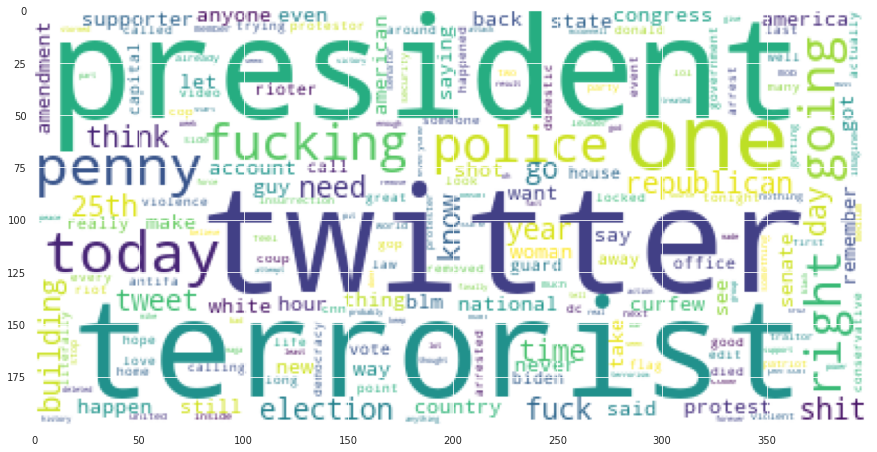

In [51]:
plt.figure(figsize=[15,8])
plt.imshow(wordcloud_3)

In [52]:
words_first_phase = [w[0] for w in most_common_first_phase]
words_second_phase = [w[0] for w in most_common_second_phase]
words_third_phase = [w[0] for w in most_common_third_phase]


####Evaluación general de palabras más usadas por fase

Palabras únicas en lista de palabras más usadas por fase

In [53]:
len(set(words_first_phase + words_second_phase + words_third_phase))

85

Palabras más usadas en fase 1 que no repiten el plato en las otras 2 fases

In [54]:
set(words_first_phase) - set(words_second_phase + words_third_phase)

{'actually',
 'cruz',
 'evidence',
 'hour',
 'house',
 'lol',
 'look',
 'make',
 'mask',
 'mcconnell',
 'mitch',
 'objection',
 'oh',
 'party',
 'pop',
 'really',
 'speech',
 'take',
 'ted',
 'trying',
 'vote'}

Palabras más usadas en fase 2 que no repiten el plato en las otras 2 fases

In [55]:
set(words_second_phase) - set(words_first_phase + words_third_phase)

{'america',
 'biden',
 'capital',
 'conservative',
 'coup',
 'guard',
 'law',
 'national',
 'office',
 'protester',
 'protestors'}

Palabras más usadas en fase 3 que no repiten el plato en las otras 2 fases

In [56]:
set(words_third_phase) - set(words_first_phase + words_second_phase)

{'25th',
 'account',
 'congress',
 'could',
 'curfew',
 'got',
 'senate',
 'still',
 "trump's",
 'tweet',
 'twitter'}

Intersección entre listas de palabras más usadas por fase

In [57]:
set(words_third_phase) & set(words_first_phase) & set(words_second_phase)

{'capitol',
 'election',
 'even',
 'fuck',
 'fucking',
 'get',
 'go',
 'going',
 'know',
 'like',
 'need',
 'one',
 'people',
 'republican',
 'right',
 'say',
 'see',
 'shit',
 'state',
 'think',
 'time',
 'trump',
 'would'}

###**Fuente #2 thedonald.win**

####**Adición de nuevas columnas**

In [58]:

df_dt['comment_contraction'] = df_dt.comment.apply(lambda x: contractions.fix(x))
df_dt['comment_prep'] = df_dt.comment_contraction.apply(text_prep)

####**Análisis de frecuencia de palabras**

#####**Primera fase**

######**Frecuencia**

In [59]:
freq_first_phase =  FreqDist(tknzr.tokenize(
    ' '.join(df_dt.comment_prep)
  ))


FreqDist(tknzr.tokenize(' '.join(df_dt.comment_prep)))
most_common_first_phase = freq_first_phase.most_common(50)

In [60]:
freq_first_phase.N(), len(freq_first_phase.items())

(46882, 7904)

In [61]:
wordcloud = WordCloud(background_color='white',
                      max_font_size = 70,
                      collocations=False).generate(' '.join(df_dt.comment_prep)
    .replace('trump', '')
    .replace('people', '')
    .replace('capitol', ''))

######**Wordcloud**

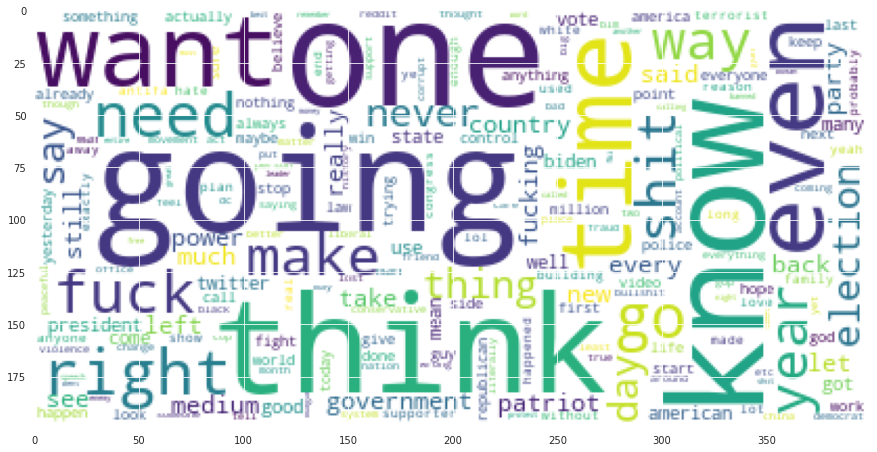

In [62]:

plt.figure(figsize=[15,8])
plt.imshow(wordcloud)

#**Extracción de patrones y descripción de insights**

In [66]:
nlp = spacy.load("en_core_web_md") # objeto nlp -> contine el modelo "medium" de spacy en inglés

###Fuente #1 Reddit

####Análisis NER

Método para obtener resultados de NER (definido en utils.py)

In [71]:
def get_ner_schema(df_input):
  dict_result = {}
  for x in df_input.index:
    doc = nlp(df_input.loc[x].comment)
    results = [(e.text, e.label_) for e in doc.ents if e.label_ in ['ORG', 'NORP', 'GPE','PERSON']]
    for x in results:
      if x not in dict_result:
        dict_result[x] = 1
      else:
        dict_result[x] += 1
  return dict_result

Resultados NER por cada fase

In [73]:
df_rd_fp_schema = get_ner_schema(df_rd_first_phase) 
print_ner_results(df_rd_fp_schema)

Trump , ORG , 594
Ted Cruz , PERSON , 314
Mitch , PERSON , 312
McConnell , PERSON , 204
Republicans , NORP , 186
Cruz , PERSON , 156
GOP , ORG , 154
Mitch , ORG , 112
Mitch McConnell , PERSON , 111
Senate , ORG , 110
Ted , PERSON , 108
Biden , NORP , 101
Arizona , GPE , 93
Democrats , NORP , 90
Republican , NORP , 74
House , ORG , 72
republicans , NORP , 64
Congress , ORG , 62
Scalise , PERSON , 58
Schumer , PERSON , 55


In [74]:
df_rd_sp_schema = get_ner_schema(df_rd_second_phase)
print_ner_results(df_rd_sp_schema) 

Trump , ORG , 2271
BLM , ORG , 746
US , GPE , 502
America , GPE , 434
Capitol , ORG , 396
Biden , NORP , 382
Republicans , NORP , 310
CNN , ORG , 266
the United States , GPE , 250
American , NORP , 240
GOP , ORG , 228
Congress , ORG , 206
Republican , NORP , 194
Senate , ORG , 181
the National Guard , ORG , 161
Twitter , ORG , 132
Donald Trump , PERSON , 129
MAGA , ORG , 128
DC , GPE , 127
Democrats , NORP , 121


In [76]:
df_rd_trp_schema = get_ner_schema(df_rd_third_phase) 
print_ner_results(df_rd_trp_schema)

Trump , ORG , 1443
Twitter , ORG , 342
BLM , ORG , 227
US , GPE , 179
CNN , ORG , 177
Capitol , ORG , 173
America , GPE , 173
Congress , ORG , 155
Republicans , NORP , 154
GOP , ORG , 145
Senate , ORG , 144
Republican , NORP , 137
American , NORP , 129
Biden , NORP , 113
the United States , GPE , 103
Donald Trump , PERSON , 83
senate , ORG , 83
Trump , PERSON , 75
congress , ORG , 74
antifa , NORP , 71


####**Representaciones de textos**

In [77]:
from gensim.models import Word2Vec


In [78]:
full_text = [word_tokenize(comment) for comment in df_rd_first_phase.comment_prep]
model_i = Word2Vec(full_text, size=100, window=5, sg=1)

full_text = [word_tokenize(comment) for comment in df_rd_second_phase.comment_prep]
model_ii = Word2Vec(full_text, size=100, window=5, sg=1)

full_text = [word_tokenize(comment) for comment in df_rd_third_phase.comment_prep]
model_iii = Word2Vec(full_text, size=100, window=5, sg=1)

#####**Representación Gráfica**

Se escogieron 5 palabras para cada fase:

Trump,America, Capitol, Blm, Twitter

######Primera fase

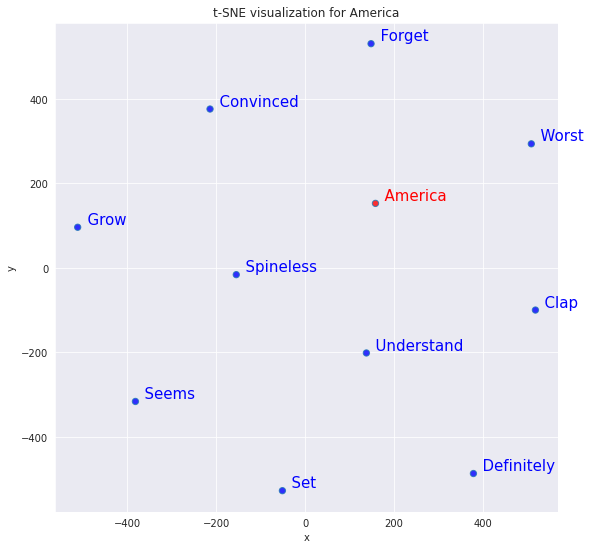

In [79]:
tsnescatterplot(model_i, 'america',[])

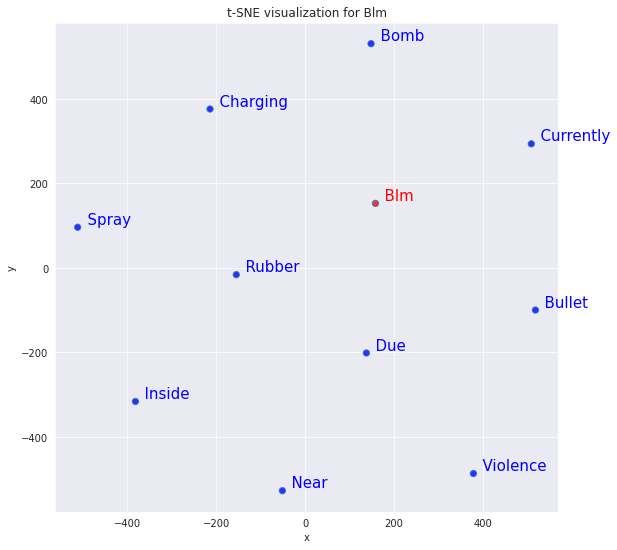

In [80]:
tsnescatterplot(model_i, 'blm',[])

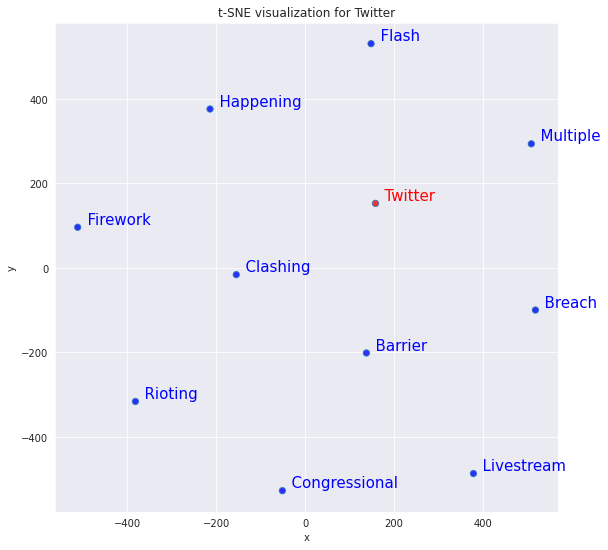

In [81]:
tsnescatterplot(model_i, 'twitter',[])

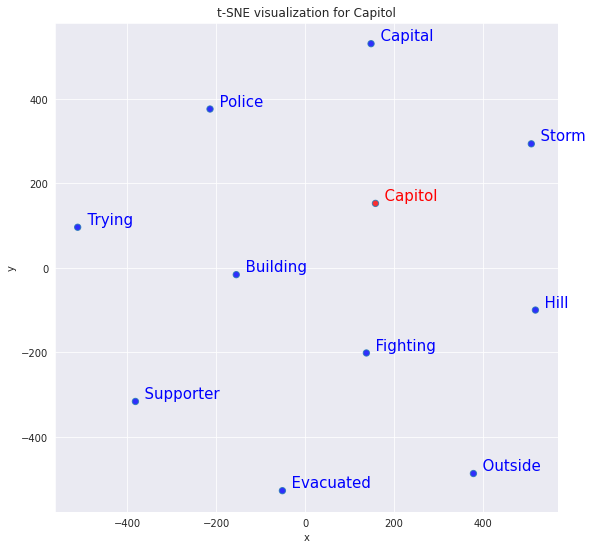

In [82]:
tsnescatterplot(model_i, 'capitol',[])

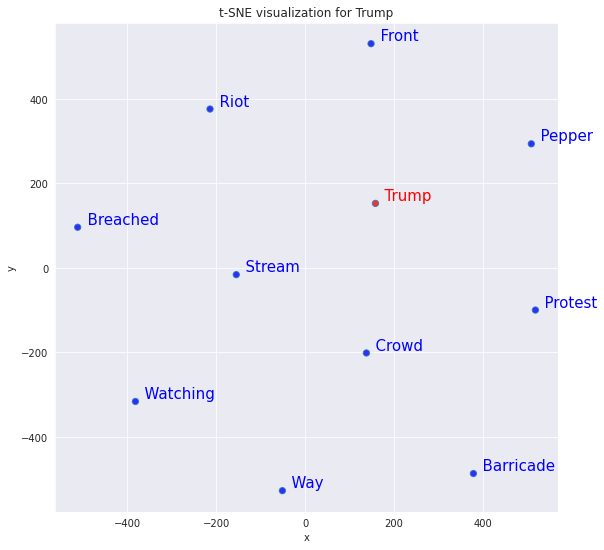

In [83]:
tsnescatterplot(model_i, 'trump',[])

######Segunda fase

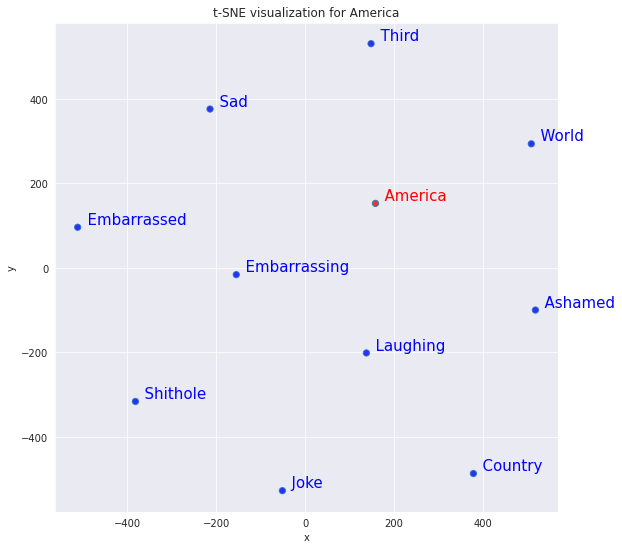

In [84]:
tsnescatterplot(model_ii, 'america',[])

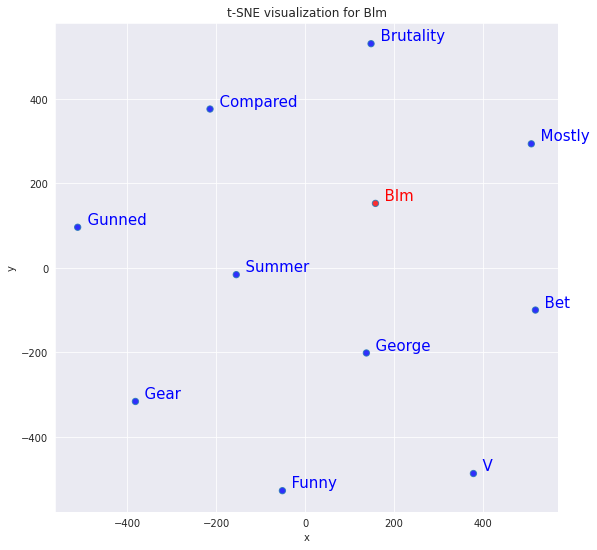

In [85]:
tsnescatterplot(model_ii, 'blm',[])

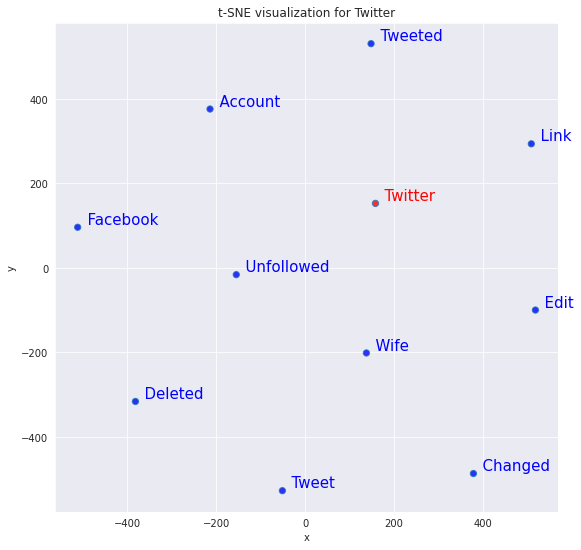

In [86]:
tsnescatterplot(model_ii, 'twitter',[])

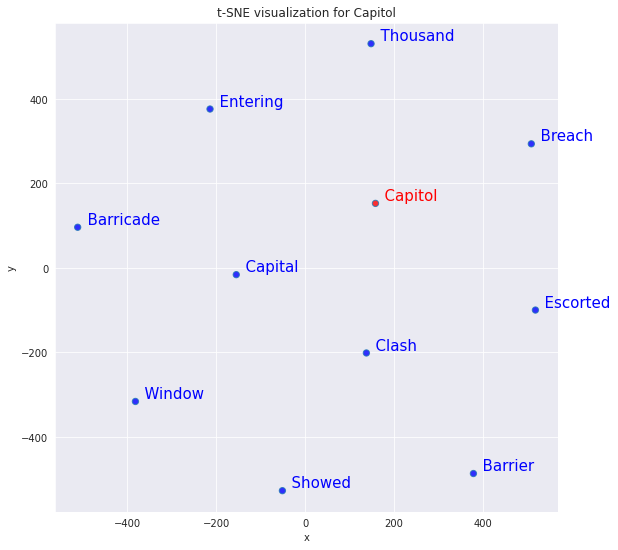

In [87]:
tsnescatterplot(model_ii, 'capitol',[])

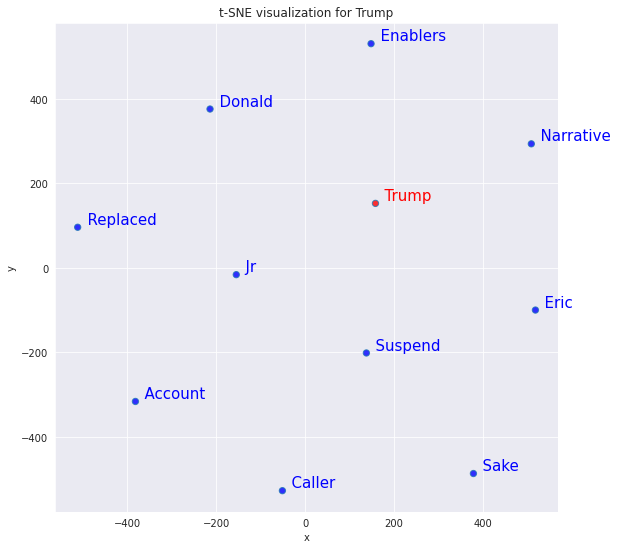

In [88]:
tsnescatterplot(model_ii, 'trump',[])

######Tercera fase

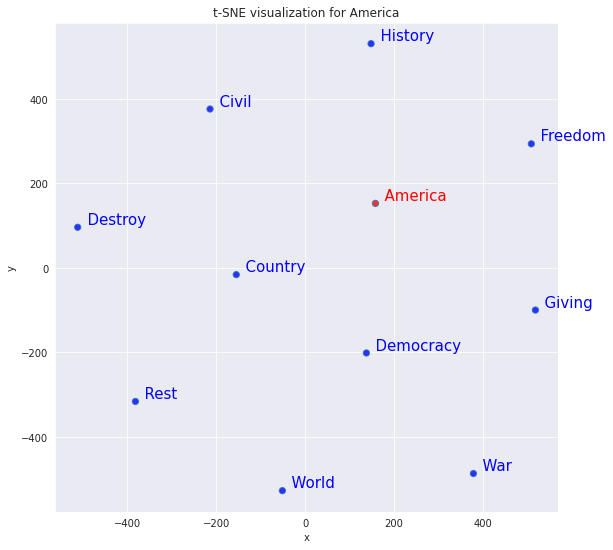

In [89]:
tsnescatterplot(model_iii, 'america',[])

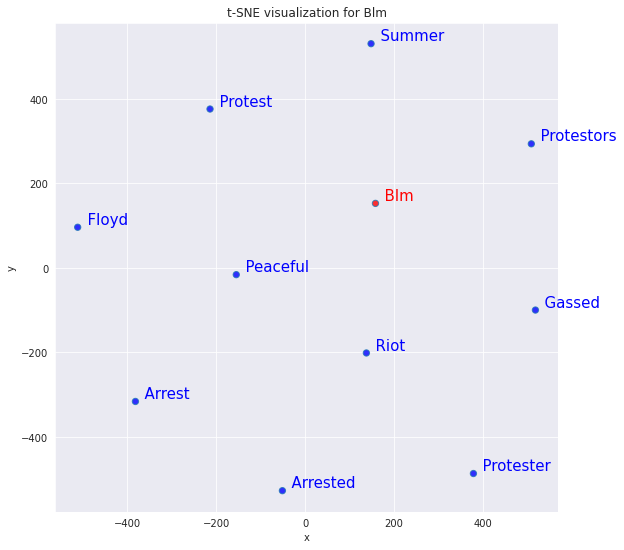

In [90]:
tsnescatterplot(model_iii, 'blm',[])

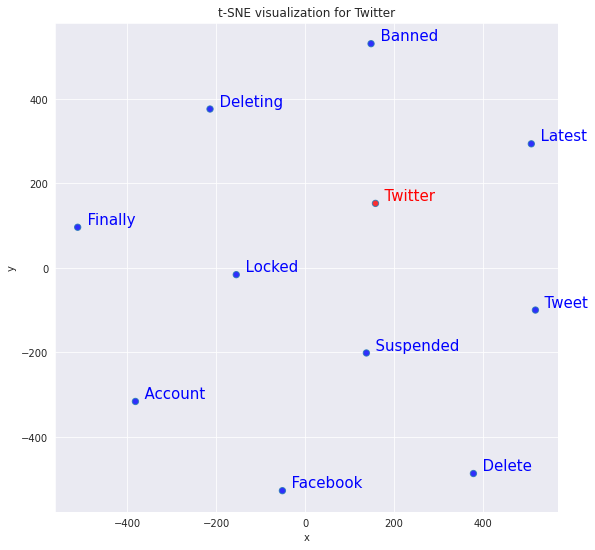

In [91]:
tsnescatterplot(model_iii, 'twitter',[])

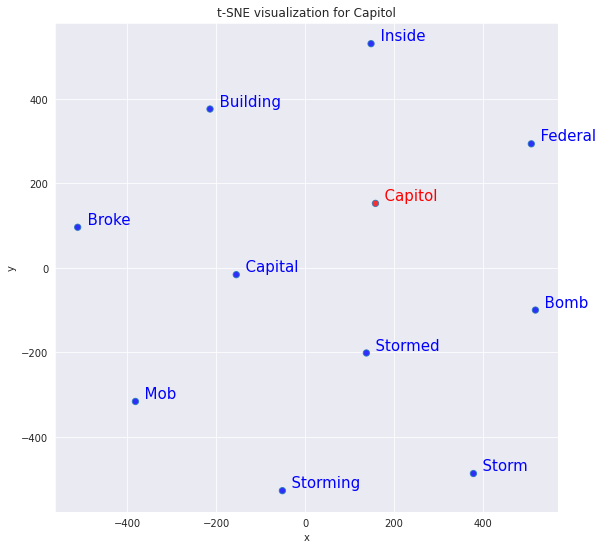

In [92]:
tsnescatterplot(model_iii, 'capitol',[])

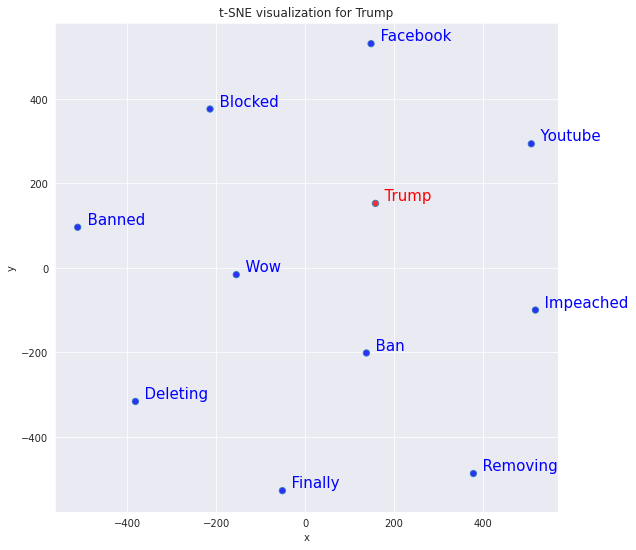

In [93]:
tsnescatterplot(model_iii, 'trump',[])

####**Topic Modeling**

#####Primera fase

Agrupaciones formadas 

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=20000).fit(df_rd_first_phase['comment_prep'])
plot_vec = bow.transform(df_rd_first_phase['comment_prep'])

In [96]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics,
                          learning_decay=.9
                          , verbose=True).fit(plot_vec)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [97]:
lda_data = lda.transform(plot_vec)

In [98]:
lda.components_[0]

array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1])

In [99]:
for idx, topic in enumerate(lda.components_):
  print("\n Topic " + str(idx))
  for i in topic.argsort()[:-6:-1]:
    print(bow.get_feature_names()[i])


 Topic 0
going
evidence
time
court
take

 Topic 1
trump
penny
lmao
mitch
want

 Topic 2
trump
election
penny
fucking
cruz

 Topic 3
people
lol
mitch
trump
like

 Topic 4
cruz
mitch
ted
mcconnell
like

 Topic 5
state
mask
vote
like
republican

 Topic 6
fuck
oh
jordan
shut
capitol

 Topic 7
capitol
like
building
vote
trump

 Topic 8
trump
time
like
people
vote

 Topic 9
pop
going
hour
state
every


#####Segunda fase

Agrupaciones formadas

In [100]:
bow = CountVectorizer(max_features=20000).fit(df_rd_second_phase['comment_prep'])
plot_vec = bow.transform(df_rd_second_phase['comment_prep'])

In [101]:
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics,
                          learning_decay=.9
                          , verbose=True).fit(plot_vec)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [102]:
lda_data = lda.transform(plot_vec)

In [103]:
lda.components_[0]

array([0.1       , 0.1       , 0.1       , ..., 0.10000532, 0.10001561,
       0.1       ])

In [104]:
for idx, topic in enumerate(lda.components_):
  print("\n Topic " + str(idx))
  for i in topic.argsort()[:-6:-1]:
    print(bow.get_feature_names()[i])


 Topic 0
state
president
trump
united
biden

 Topic 1
tear
gas
police
bullet
capitol

 Topic 2
capitol
shot
police
building
inside

 Topic 3
like
year
news
conservative
look

 Topic 4
capitol
police
would
people
building

 Topic 5
trump
need
25th
office
amendment

 Topic 6
national
guard
trump
fuck
dc

 Topic 7
trump
go
people
election
know

 Topic 8
terrorist
trump
coup
people
country

 Topic 9
trump
republican
get
american
twitter


#####Tercera fase

Agrupaciones formadas

In [105]:
bow = CountVectorizer(max_features=20000).fit(df_rd_third_phase['comment_prep'])
plot_vec = bow.transform(df_rd_third_phase['comment_prep'])

In [106]:
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics,
                          learning_decay=.9
                          , verbose=True).fit(plot_vec)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [107]:
lda_data = lda.transform(plot_vec)

In [108]:
for idx, topic in enumerate(lda.components_):
  print("\n Topic " + str(idx))
  for i in topic.argsort()[:-6:-1]:
    print(bow.get_feature_names()[i])


 Topic 0
trump
people
supporter
antifa
fucking

 Topic 1
go
home
happen
day
love

 Topic 2
police
curfew
capitol
building
blm

 Topic 3
state
united
shit
trump
right

 Topic 4
shot
capitol
woman
died
police

 Topic 5
like
fucking
fuck
america
day

 Topic 6
trump
president
penny
today
national

 Topic 7
25th
trump
penny
terrorist
amendment

 Topic 8
trump
twitter
tweet
account
locked

 Topic 9
going
one
fuck
people
need


###Fuente #2 patriots.win

####Análisis NER

Método para obtener resultados de NER (definido en utils.py)

In [110]:
df_dt_ner_schema = get_ner_schema(df_dt)
print_ner_results(df_dt_ner_schema)

Trump , ORG , 361
America , GPE , 70
Biden , NORP , 60
American , NORP , 54
Twitter , ORG , 49
China , GPE , 44
FBI , ORG , 41
US , GPE , 41
GOP , ORG , 39
BLM , ORG , 38
MAGA , ORG , 35
Congress , ORG , 33
Patriots , ORG , 31
MSM , ORG , 31
Americans , NORP , 31
Texas , GPE , 30
Antifa , NORP , 28
DC , GPE , 28
antifa , NORP , 25
congress , ORG , 24


####**Representaciones de textos**

In [111]:
full_text_dt = [word_tokenize(comment) for comment in df_dt.comment_prep]

In [112]:
model_dt = Word2Vec(full_text_dt, size=100, window=5, sg=1)

#####**Representación Gráfica**

Relaciones de Twitter

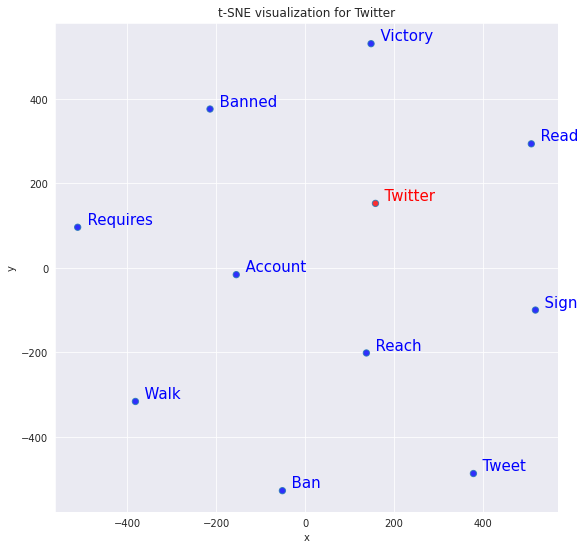

In [113]:
tsnescatterplot(model_dt, 'twitter',[])

Relaciones de Trump

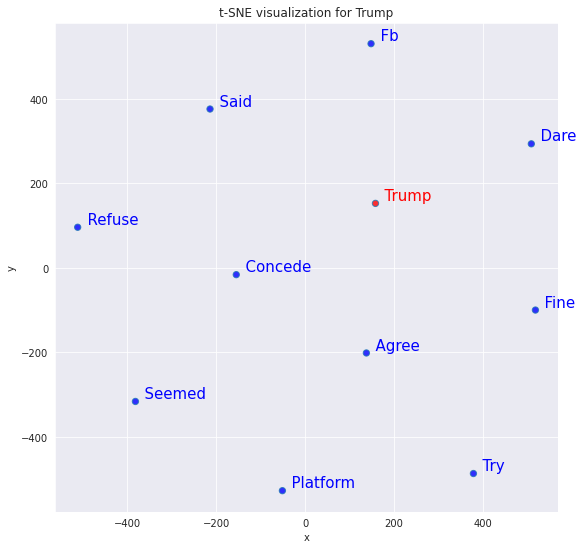

In [114]:
tsnescatterplot(model_dt, 'trump',[])

Relaciones de Antifa

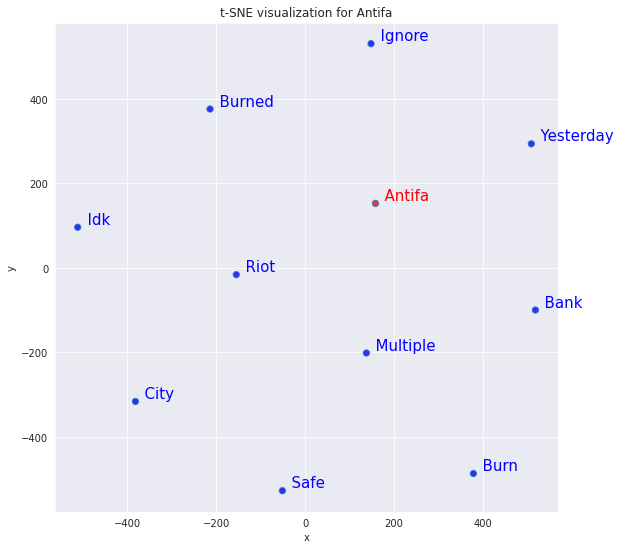

In [115]:
tsnescatterplot(model_dt, 'antifa',[])

Relaciones de América

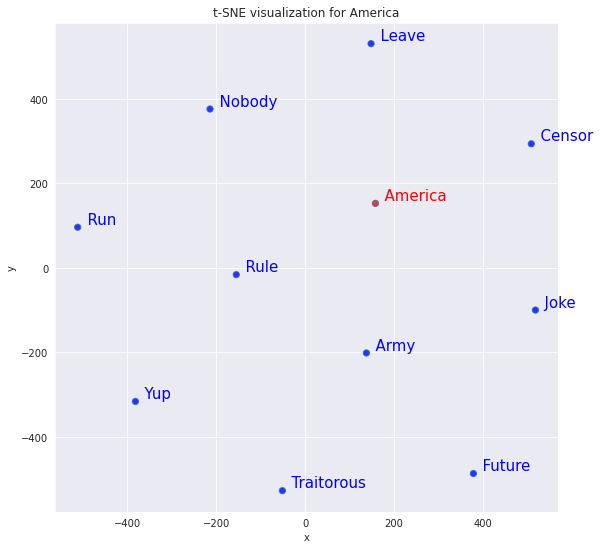

In [116]:
tsnescatterplot(model_dt, 'america',[])

Relaciones de Biden

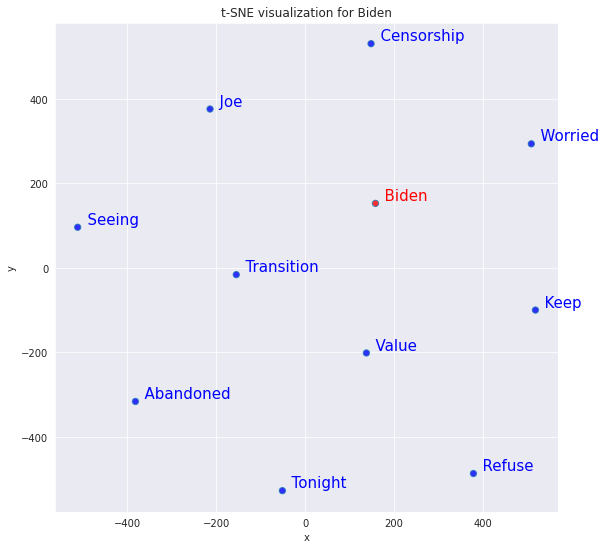

In [117]:
tsnescatterplot(model_dt, 'biden',[])

Relaciones de BLM

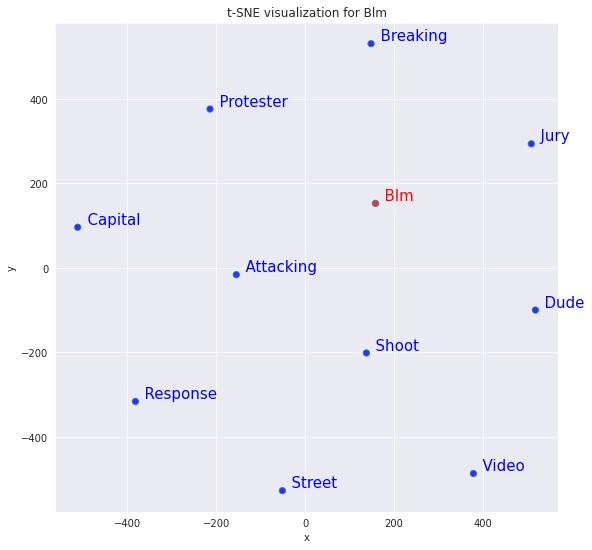

In [118]:
tsnescatterplot(model_dt, 'blm',[])

####**Topic Modeling**

In [119]:
bow = CountVectorizer(max_features=20000).fit(df_dt['comment_prep'])
plot_vec = bow.transform(df_dt['comment_prep'])

In [120]:
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics,
                          learning_decay=.9
                          , verbose=True).fit(plot_vec)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [121]:
lda_data = lda.transform(plot_vec)

In [122]:
lda.components_[0]

array([0.1, 0.1, 1.1, ..., 0.1, 0.1, 0.1])

Listado de agrupaciones de palabras

In [123]:
for idx, topic in enumerate(lda.components_):
  print("\n Topic " + str(idx))
  for i in topic.argsort()[:-6:-1]:
    print(bow.get_feature_names()[i])


 Topic 0
know
trump
friend
like
need

 Topic 1
people
trump
like
going
fuck

 Topic 2
trump
would
going
say
like

 Topic 3
people
trump
time
going
country

 Topic 4
one
even
time
trump
would

 Topic 5
party
one
want
think
even

 Topic 6
would
want
need
go
like

 Topic 7
people
would
trump
like
want

 Topic 8
get
trump
going
people
think

 Topic 9
one
every
like
year
people


##Extra: Análisis de Sentimiento

No se incluyó en la presentación debido a que se quiso poner énfasis a los objetivos de la tarea académica (analizar relaciones entre palabras)

In [124]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 5.3MB/s 


In [125]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

Adición de columnas con valores resultados del analizador de sentimiento de Vader

In [127]:
add_polarity_scores(df_rd_first_phase,analyser)
add_polarity_scores(df_rd_second_phase,analyser)
add_polarity_scores(df_rd_third_phase,analyser)
add_polarity_scores(df_dt,analyser)


/content/utils.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[x] = [result[x]  for result in lst_polarity]


###Evaluación de métrica compound para cada dataset

positive: compound score>=0.05
neutral: compound score between -0.05 and 0.05
negative: compound score<=-0.05

**Dataset Reddit - Primera fase**

In [128]:
df_rd_first_phase.compound.mean()

-0.06838145439492205

Resultado : Compound - Sentimiento negativo

**Dataset Reddit - Segunda Fase**

In [129]:
df_rd_second_phase.compound.mean()

-0.1923902666284411

Resultado : Compound - Sentimiento negativo

**Dataset Reddit - Tercera Fase**

In [130]:
df_rd_third_phase.compound.mean()

-0.13829642857142896

 Resultado : Compound - Sentimiento negativo

**Dataset patriots.win**

In [131]:
df_dt.compound.mean()

-0.07269078194532728

Resultado : Compound - Sentimiento negativo